In [1]:
from pandas import *

In [2]:
data=pandas.read_csv("./09_pandas_applications/gas_station.csv")

In [3]:
data

,odometer_miles,gallons_added,date,Unnamed: 3
0,31517,3.189,2018-08-15,NaN
1,31605,1.650,NaN,NaN
2,31727,2.329,NaN,NaN
3,31803,1.383,2018-08-27,NaN
4,31956,2.934,2018-09-05,NaN
5,32045,1.857,2018-09-11,NaN
6,32303,5.166,2018-09-19,NaN


In [4]:
# pull out "odometer mileage at fill," and "gas to fill the tank" vectors
mileage=data.iloc[:,0]
gas=data.iloc[:,1]

In [5]:
# the miles since last fill vector
dm = mileage.iloc[1:].values - mileage.iloc[0:6].values
dm

array([ 88, 122,  76, 153,  89, 258], dtype=int64)

In [6]:
# mpg values
mpg=dm/gas[1:]
# strip out the pandas indexing
mpg=mpg.values
mpg

array([53.33333333, 52.38299699, 54.95300072, 52.14723926, 47.9267636 ,
       49.94192799])

In [7]:
#print out a gas, dm and mpg values in a nice column

for i in range(len(mpg)):
    print(i,dm[i],gas[i],mpg[i]) 
    # note, the formatting statement is missing

0 88 3.1889999999999996 53.333333333333336
1 122 1.65 52.3829969944182
2 76 2.329 54.9530007230658
3 153 1.383 52.147239263803684
4 89 2.9339999999999997 47.92676359719979
5 258 1.857 49.94192799070847


In [8]:
# the same thing, with a while loop
i=0
len(mpg)

6

In [9]:
while( i<len(mpg) ):
    print(i,dm[i],gas[i],mpg[i]) 
    i = i+1

0 88 3.1889999999999996 53.333333333333336
1 122 1.65 52.3829969944182
2 76 2.329 54.9530007230658
3 153 1.383 52.147239263803684
4 89 2.9339999999999997 47.92676359719979
5 258 1.857 49.94192799070847


# Now, something different
$x_2=x_1+v_1 t$

$v_2=v_1+a_1 t$

Drop a small watermelon out the window.  While the object is above the ground, simulate the trajectory, using small dt timesteps

In [1]:
# initial parameters
v1=1.0e-10 # m/s
x1=40.0 # m
dt=0.1 # s
t1=0.0 # s
m=2.0 #kg

# for the drag calculation
import math
Cd=0.47
rho=1.225 # kg/m^3
r=0.3 # m
A=math.pi*r**2
c=0.5*rho*Cd*A
g=9.81

In [2]:
x=[]
v=[]
a=[]
t=[]
while (x1>0.0):
    a1=(-m*g + c*v1*v1*(-v1/abs(v1)))/m
    v2=v1+a1*dt
    x2=x1+v1*dt
    
    x.append(x1)
    v.append(v1)
    a.append(a1)
    t.append(t1)
    
    x1=x2
    v1=v2
    t1=t1+dt

Text(0.5,0,'time, t, (s)')

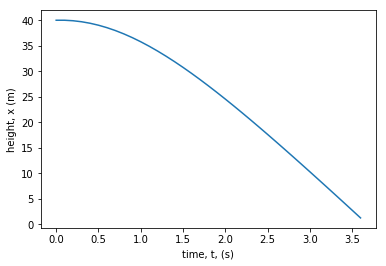

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(t,x)
plt.ylabel("height, x (m)")
plt.xlabel("time, t, (s)")

Text(0.5,0,'time, t, (s)')

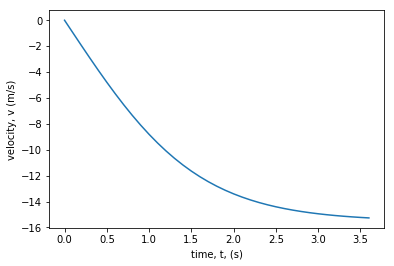

In [4]:
plt.plot(t,v)
plt.ylabel("velocity, v (m/s)")
plt.xlabel("time, t, (s)")

Text(0.5,0,'time, t, (s)')

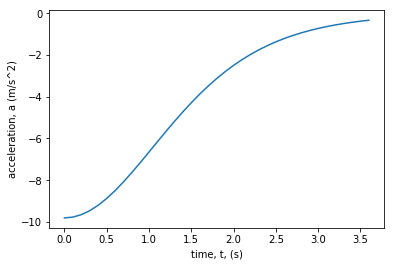

In [5]:
plt.plot(t,a)
plt.ylabel("acceleration, a (m/s^2)")
plt.xlabel("time, t, (s)")

# How does this compare to simple kinematics?

In [6]:
x_th=[]
v_th=[]
for time in t:
    x_th.append(x[0]+v[0]*time-g*time*time/2)
    v_th.append(v[0]-g*time)

Text(0.5,0,'time, t, (s)')

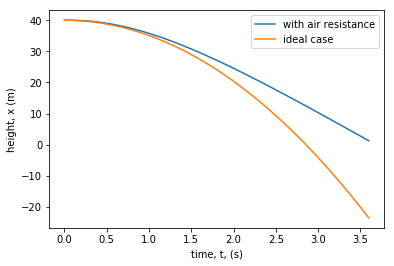

In [7]:
plt.plot(t,x,label="with air resistance")
plt.plot(t,x_th,label="ideal case")
plt.legend()
plt.ylabel("height, x (m)")
plt.xlabel("time, t, (s)")

Note, air resistance predicts a terminal velocity of 
$mg=cv^2$ or $v=\sqrt{mg/c}=\sqrt{\frac{2 m g}{C_D A \rho}}$

terminal velocity is predicted to be 15.53 (m/s)


Text(0.5,0,'time, t, (s)')

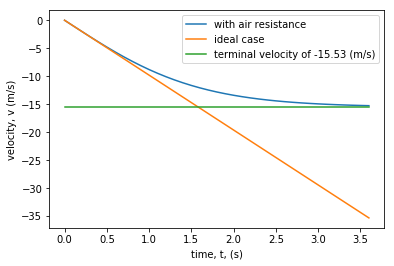

In [9]:
v_terminal=(2*m*g/(Cd*rho*A))**0.5
print("terminal velocity is predicted to be %.2f (m/s)" % v_terminal)
plt.plot(t,v,label="with air resistance")
plt.plot(t,v_th,label="ideal case")
caption="terminal velocity of %.2f (m/s)"%(-1.0*v_terminal)
plt.plot([t[0],t[-1]],[-v_terminal,-v_terminal],label=caption)
plt.legend()
plt.ylabel("velocity, v (m/s)")
plt.xlabel("time, t, (s)")